In [19]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

In [20]:
IMAGE_FORMAT = 'eps'
#IMAGE_DIR = 'C:/Users/jacob/Documents/GitHub/RotationCurves/images/'
IMAGE_DIR = '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/images/'

#master_table = Table.read( 'C:/Users/jacob/Documents/GitHub/RotationCurves/master_file.txt', format='ascii.ecsv')
master_table = Table.read('/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/master_file_vflag.txt', 
                          format='ascii.ecsv')

In [21]:
###########################################################################
# Initialize the arrays to store the v_max differences, inclination angles,
#    mass ratios, and the errors associed with them as available.
#--------------------------------------------------------------------------
v_max_diff_wall = []
v_max_diff_wall_error = []
v_max_diff_void = []
v_max_diff_void_error = []
v_max_diff_other = []
v_max_diff_other_error = []

inclin_angle_wall = []
inclin_angle_void = []
inclin_angle_other = []

mass_ratio_wall = []
mass_ratio_wall_error = []
mass_ratio_void = []
mass_ratio_void_error = []
mass_ratio_other = []
mass_ratio_other_error = []

chi2_wall = []
chi2_void = []
chi2_other = []
###########################################################################


###########################################################################
# Import the necessary data from the master_file.
#--------------------------------------------------------------------------
vflag_list = master_table['vflag']
pos_v_max = master_table['pos_v_max']
pos_v_max_error = master_table['pos_v_max_sigma']
neg_v_max = master_table['neg_v_max']
neg_v_max_error = master_table['neg_v_max_sigma']
axes_ratios = master_table['NSA_b/a']
mass_ratio = master_table['Mdark_Mstar_ratio']
mass_ratio_error = master_table['Mdark_Mstar_ratio_error']
chi2_list = master_table['avg_chi_square_rot']
###########################################################################


###########################################################################
# For each galaxy in the master_table, calculate the difference in the
#    v_max parameter for the positive and negative rotation curves and the
#    inclination angle of the galaxy. Add these quantities along with their
#    errors as available and the stellar mass to dark matter mass ratio
#    along with its error to arrays separated by the total distribution,
#    voids, walls, galaxies on the edge of the MaNGA footprint, and
#    galaxies not found within the MaNGA footprint.
#--------------------------------------------------------------------------
for vflag, pos_v_max, pos_v_max_err, neg_v_max, neg_v_max_err, b_over_a, ratio, ratio_err, chi2 in \
  zip( vflag_list, pos_v_max, pos_v_max_error, neg_v_max, neg_v_max_error,
      axes_ratios, mass_ratio, mass_ratio_error, chi2_list):

    v_max_diff = pos_v_max - neg_v_max
    v_max_diff_err = np.sqrt( pos_v_max_err**2 + neg_v_max_err**2)

    inc_angle = np.arccos( b_over_a) * ( 180 / np.pi)

    if vflag == 0:
        v_max_diff_wall.append( v_max_diff)
        v_max_diff_wall_error.append( v_max_diff_err)
        inclin_angle_wall.append( inc_angle)
        mass_ratio_wall.append( ratio)
        mass_ratio_wall_error.append( ratio_err)
        chi2_wall.append( chi2)

    elif vflag == 1:
        v_max_diff_void.append( v_max_diff)
        v_max_diff_void_error.append( v_max_diff_err)
        inclin_angle_void.append( inc_angle)
        mass_ratio_void.append( ratio)
        mass_ratio_void_error.append( ratio_err)
        chi2_void.append( chi2)

    elif vflag == 2 or vflag == -9:
        v_max_diff_other.append( v_max_diff)
        v_max_diff_other_error.append( v_max_diff_err)
        inclin_angle_other.append( inc_angle)
        mass_ratio_other.append( ratio)
        mass_ratio_other_error.append( ratio_err)
        chi2_other.append( chi2)
###########################################################################


###########################################################################
# Calculate the mean, RMS, and standard deviation for the void, wall, and
#    total distributions in the histogram below.
#--------------------------------------------------------------------------
# v_max_wall_mean = np.mean( v_max_diff_wall)
# v_max_void_mean = np.mean( v_max_diff_void)
# v_max_other_mean = np.mean( v_max_diff_other)
# v_max_wall_stdev = np.std( v_max_diff_wall)
# v_max_void_stdev = np.std( v_max_diff_void)
# v_max_other_stdev = np.std( v_max_diff_other)
# v_max_wall_rms = np.sqrt( np.mean( v_max_diff_wall**2))
# v_max_void_rms = np.sqrt( np.mean( v_max_diff_void**2))
# v_max_other_rms = np.sqrt( np.mean( v_max_diff_other**2))
###########################################################################


###########################################################################
# Variables that are used in the resolution of the fitting of the gaussian
#    are located directly below.
#--------------------------------------------------------------------------
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
###########################################################################

## Distribution in fitted maximum velocity difference

"\nplt.savefig( IMAGE_DIR + '/histograms/v_max_diff_hist.' + IMAGE_FORMAT,\n            format=IMAGE_FORMAT)\n"

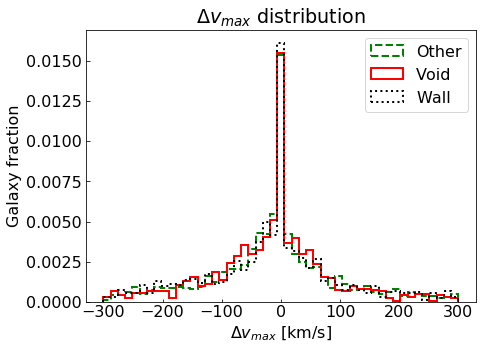

In [22]:
plt.rc('font', size=16)
lwidth = 2 # Line width used in plots

###########################################################################
# Hard-coded entry for the bins for the histrogram plots at the end of this
#    function.
#--------------------------------------------------------------------------
hist_range = ( -300, 300)
BINS = np.linspace( hist_range[0], hist_range[1], 50)
###########################################################################


###########################################################################
# Plot the v_max_diff distribution and separate the distributions into
#    walls, voids, and other.
#--------------------------------------------------------------------------
#v_max_diff_hist = plt.figure()
plt.figure(figsize=(7,5))
plt.title('$\Delta v_{max}$ distribution')

plt.hist( v_max_diff_other, BINS, color='g', density=True, histtype='step', 
         linewidth=lwidth, linestyle='--', label='Other')
# p = norm.pdf(x, v_max_other_mean, v_max_other_stdev)
# plt.plot(x, p, 'g--', linewidth=2)
# plt.axvline( v_max_other_mean, color='green', linestyle='-', linewidth=1.5)
# plt.axvline( v_max_other_mean + v_max_other_stdev,
#             color='green', linestyle=':', linewidth=1)
# plt.axvline( v_max_other_mean - v_max_other_stdev,
#             color='green', linestyle=':', linewidth=1)
# plt.axvline( v_max_other_mean + 2*v_max_other_stdev,
#             color='green', linestyle=':', linewidth=1)
# plt.axvline( v_max_other_mean - 2*v_max_other_stdev,
#             color='green', linestyle=':', linewidth=1)
# _, mean_v_max_other_ = plt.ylim()
# plt.text(v_max_other_mean + v_max_other_mean/10,
#      mean_v_max_other_ - mean_v_max_other_/10,
#      'Mean: {:.2f}'.format( v_max_other_mean))

plt.hist( v_max_diff_void, BINS, color='r', density=True, histtype='step',
         linewidth=lwidth, label='Void')
# p = norm.pdf(x, v_max_void_mean, v_max_void_stdev)
# plt.plot(x, p, 'r--', linewidth=2)
# plt.axvline( v_max_void_mean, color='red', linestyle='-', linewidth=1.5)
# plt.axvline( v_max_void_mean + v_max_void_stdev,
#             color='red', linestyle=':', linewidth=1)
# plt.axvline( v_max_void_mean - v_max_void_stdev,
#             color='red', linestyle=':', linewidth=1)
# plt.axvline( v_max_void_mean + 2*v_max_void_stdev,
#             color='red', linestyle=':', linewidth=1)
# plt.axvline( v_max_void_mean - 2*v_max_void_stdev,
#             color='red', linestyle=':', linewidth=1)
# _, mean_void_v_max_ = plt.ylim()
# plt.text(v_max_void_mean + v_max_void_mean/10,
#      mean_void_v_max_ - mean_void_v_max_/10,
#      'Mean: {:.2f}'.format( v_max_void_mean))

plt.hist( v_max_diff_wall, BINS, color='k', density=True, histtype='step', 
         linewidth=lwidth, linestyle=':', label='Wall')
# p = norm.pdf(x, v_max_wall_mean, v_max_wall_stdev)
# plt.plot(x, p, 'k--', linewidth=2)
# plt.axvline( v_max_wall_mean, color='black', linestyle='-', linewidth=1.5)
# plt.axvline( v_max_wall_mean + v_max_wall_stdev,
#             color='black', linestyle=':', linewidth=1)
# plt.axvline( v_max_wall_mean - v_max_wall_stdev,
#             color='black', linestyle=':', linewidth=1)
# plt.axvline( v_max_wall_mean + 2*v_max_wall_stdev,
#             color='black', linestyle=':', linewidth=1)
# plt.axvline( v_max_wall_mean - 2*v_max_wall_stdev,
#             color='black', linestyle=':', linewidth=1)
# _, mean_wall_v_max_ = plt.ylim()
# plt.text(v_max_wall_mean + v_max_wall_mean/10,
#      mean_wall_v_max_ - mean_wall_v_max_/10,
#      'Mean: {:.2f}'.format( v_max_wall_mean))


#ax = v_max_diff_hist.add_subplot(111)
plt.tick_params( axis='both', direction='in')
#ax.yaxis.set_ticks_position('both')
#ax.xaxis.set_ticks_position('both')
plt.ylabel('Galaxy fraction')
plt.xlabel('$\Delta v_{max}$ [km/s]')
plt.legend()

# textstr = '\n'.join((
#       r'$STDEV_{wall}$: $%.2f$' % ( v_max_wall_stdev, ),
#       r'$STDEV_{void}$: $%.2f$' % ( v_max_void_stdev, ),
#       r'STDEV: $%.2f$' % ( v_max_other_stdev, ),
#       r'$RMS_{wall}$: $%.2f$' % ( v_max_wall_rms, ),
#       r'$RMS_{void}$: $%.2f$' % ( v_max_void_rms, ),
#       r'RMS: $%.2f$' % ( v_max_other_rms, )))

# props = dict( boxstyle='round', facecolor='cornsilk', alpha=0.6)

# ax.text(0.72, 0.95, textstr,
#         verticalalignment='top', horizontalalignment='left',
#         transform=ax.transAxes,
#         color='black', fontsize=8, bbox=props)
'''
plt.savefig( IMAGE_DIR + '/histograms/v_max_diff_hist.' + IMAGE_FORMAT,
            format=IMAGE_FORMAT)
'''
#plt.show()
#plt.close()
###########################################################################

## Scatter of fitted maximum velocity v. galaxy inclination angle

"\nplt.savefig( IMAGE_DIR + '/v_max_vs_inclination.' + IMAGE_FORMAT,\n             format=IMAGE_FORMAT)\n"

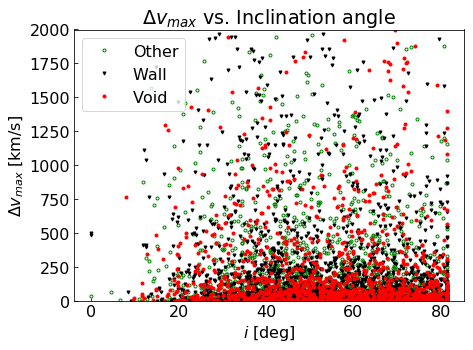

In [23]:
###########################################################################
# Plot the difference in the fitted v_max parameters from the positive and
#    negative rotation curves against the inclination angle of the galaxy
#    to see if there is any correlation.
#
# NOTE: Distributions are separated by wall, void, if the galaxy is cut off
#       by the edge of the footprint, or if the galaxy is not found within
#       the footprint.
#--------------------------------------------------------------------------
#v_max_diff_vs_inclination_fig = plt.figure()
plt.figure(figsize=(7,5))
plt.title('$\Delta v_{max}$ vs. Inclination angle')

# plot points with errorbars
# plt.errorbar( inclin_angle_wall, np.abs( v_max_diff_wall),
#              yerr=v_max_diff_wall_error, fmt='kv', ecolor='black')
# plt.errorbar( inclin_angle_void, np.abs( v_max_diff_void),
#              yerr=v_max_diff_void_error, fmt='ro', ecolor='red')
# plt.errorbar( inclin_angle_other, np.abs( v_max_diff_other),
#              yerr=v_max_diff_other_error,
#              fmt='go', ecolor='green', fillstyle='none')
#plt.errorbar( inclination_angle, np.abs( v_max_difference),
#             yerr=v_max_difference_error , fmt='ko', ecolor='gray')


# plot points without errorbars
plt.plot( inclin_angle_other, np.abs( v_max_diff_other), 'go', markersize=3, fillstyle='none', label='Other')
plt.plot( inclin_angle_wall, np.abs( v_max_diff_wall), 'kv', markersize=3, label='Wall')
plt.plot( inclin_angle_void, np.abs( v_max_diff_void), 'ro', markersize=3, label='Void')
#plt.plot( inclination_angle, v_max_difference, 'ko')

#ax = v_max_diff_vs_inclination_fig.add_subplot(111)
plt.tick_params( axis='both', direction='in')
#ax.yaxis.set_ticks_position('both')
#ax.xaxis.set_ticks_position('both')
plt.ylabel('$\Delta v_{max}$ [km/s]')
plt.ylim( ( 0, 2000))
plt.xlabel('$i$ [deg]')
plt.legend()
'''
plt.savefig( IMAGE_DIR + '/v_max_vs_inclination.' + IMAGE_FORMAT,
             format=IMAGE_FORMAT)
'''
#plt.show()
#plt.close()
###########################################################################

## Scatter of fitted maximum velocity vs. ratio of dark matter halo mass to stellar mass

"\nplt.savefig( IMAGE_DIR + '/v_max_vs_mass_ratio.' + IMAGE_FORMAT,\n            format=IMAGE_FORMAT)\n"

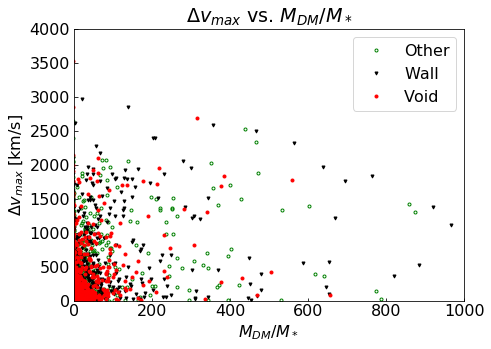

In [24]:
###########################################################################
# Plot the difference in the fitted v_max parameters from the positive and
#    negative rotation curves against the stellar mass to dark matter mass
#    ratio to see if there is any correlation.
#
# NOTE: Distributions are separated by wall, void, if the galaxy is cut off
#       by the edge of the footprint, or if the galaxy is not found within
#       the footprint.
#--------------------------------------------------------------------------
#v_max_diff_vs_mass_ratio_fig = plt.figure()
plt.figure(figsize=(7,5))
plt.title("$\Delta v_{max}$ vs. $M_{DM}/M_*$")

# plot points with errorbars
# plt.errorbar( mass_ratio_wall, np.abs( v_max_diff_wall),
#              xerr=mass_ratio_wall_error, yerr=v_max_diff_wall_error,
#              fmt='kv', ecolor='black')
# plt.errorbar( mass_ratio_void, np.abs( v_max_diff_void),
#              xerr=mass_ratio_void_error, yerr=v_max_diff_void_error,
#              fmt='ro', ecolor='red')
# plt.errorbar( mass_ratio_other, np.abs( v_max_diff_other),
#              xerr=mass_ratio_other_error, yerr=v_max_diff_other_error,
#              fmt='go', ecolor='green', fillstyle='none')
#plt.errorbar( mass_ratio, np.abs( v_max_difference),
#             xerr=mass_ratio_error, yerr=v_max_difference_error,
#             fmt='ko', ecolor='gray')


# plot points without errorbars
plt.plot( mass_ratio_other, np.abs(v_max_diff_other), 'go', markersize=3, fillstyle='none', label='Other')
plt.plot( mass_ratio_wall, np.abs(v_max_diff_wall), 'kv', markersize=3, label='Wall')
plt.plot( mass_ratio_void, np.abs(v_max_diff_void), 'ro', markersize=3, label='Void')
#plt.plot( mass_ratio, np.abs(v_max_difference), 'ko', markersize=2)

#ax = v_max_diff_vs_mass_ratio_fig.add_subplot(111)
plt.tick_params( axis='both', direction='in')
#ax.yaxis.set_ticks_position('both')
#ax.xaxis.set_ticks_position('both')
plt.ylabel('$\Delta v_{max}$ [km/s]')
plt.xlabel('$M_{DM}/M_*$')
plt.ylim( (0, 4000))
plt.xlim( (0, 1000))
plt.legend()
'''
plt.savefig( IMAGE_DIR + '/v_max_vs_mass_ratio.' + IMAGE_FORMAT,
            format=IMAGE_FORMAT)
'''
#plt.show()
#plt.close()
###########################################################################

## Scatter of Chi Square versus difference in fitted maximum velocity

"\nplt.savefig( IMAGE_DIR + '/v_max_vs_mass_ratio.' + IMAGE_FORMAT,\n            format=IMAGE_FORMAT)\n"

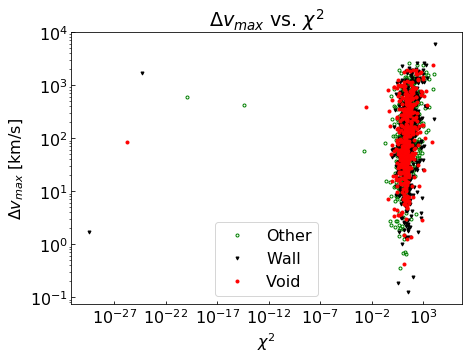

In [25]:
###########################################################################
# Plot the difference in the fitted v_max parameters from the positive and
#    negative rotation curves against the Chi Square to see if there is any 
#    correlation.
#
# NOTE: Distributions are separated by wall, void, if the galaxy is cut off
#       by the edge of the footprint, or if the galaxy is not found within
#       the footprint.
#--------------------------------------------------------------------------
#v_max_diff_vs_mass_ratio_fig = plt.figure()
plt.figure(figsize=(7,5))
plt.title("$\Delta v_{max}$ vs. $\chi^2$")

# plot points with errorbars
# plt.errorbar( mass_ratio_wall, np.abs( v_max_diff_wall),
#              xerr=mass_ratio_wall_error, yerr=v_max_diff_wall_error,
#              fmt='kv', ecolor='black')
# plt.errorbar( mass_ratio_void, np.abs( v_max_diff_void),
#              xerr=mass_ratio_void_error, yerr=v_max_diff_void_error,
#              fmt='ro', ecolor='red')
# plt.errorbar( mass_ratio_other, np.abs( v_max_diff_other),
#              xerr=mass_ratio_other_error, yerr=v_max_diff_other_error,
#              fmt='go', ecolor='green', fillstyle='none')
#plt.errorbar( mass_ratio, np.abs( v_max_difference),
#             xerr=mass_ratio_error, yerr=v_max_difference_error,
#             fmt='ko', ecolor='gray')


# plot points without errorbars
plt.loglog( chi2_other, v_max_diff_other, 'go', markersize=3, fillstyle='none', label='Other')
plt.loglog( chi2_wall, v_max_diff_wall, 'kv', markersize=3, label='Wall')
plt.loglog( chi2_void, v_max_diff_void, 'ro', markersize=3, label='Void')
#plt.plot( mass_ratio, chi2_list, 'ko', markersize=2)

#ax = v_max_diff_vs_mass_ratio_fig.add_subplot(111)
plt.tick_params( axis='both', direction='in')
#ax.yaxis.set_ticks_position('both')
#ax.xaxis.set_ticks_position('both')
plt.ylabel('$\Delta v_{max}$ [km/s]')
plt.xlabel('$\chi^2$')
#plt.ylim( (0, 4000))
#plt.xlim( (0, 1000))
plt.legend()
'''
plt.savefig( IMAGE_DIR + '/v_max_vs_mass_ratio.' + IMAGE_FORMAT,
            format=IMAGE_FORMAT)
'''
#plt.show()
#plt.close()
###########################################################################